# H-polytope of points

In [124]:
import numpy as np
import pypolycontain as pp
import pydrake.solvers.mathematicalprogram as MP
import pydrake.solvers.gurobi as Gurobi_drake
# use Gurobi solver
global gurobi_solver, license
gurobi_solver=Gurobi_drake.GurobiSolver()
license = gurobi_solver.AcquireLicense()
import pydrake.solvers.scs as SCS
scs_solver=SCS.ScsSolver()
# matlpotlib
import matplotlib.pyplot as plt

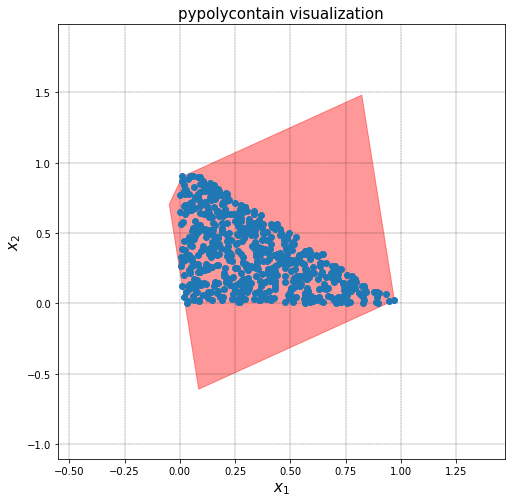

In [131]:
n,q=2,1200
x=np.random.random((n,q))
X=np.hstack([x[:,i].reshape(n,1) for i in range(q) if x[0,i]+x[1,i]<=1 ])

N=3
n=X.shape[0]
_H=np.random.normal(size=(N,n))
H=np.vstack((-_H,_H))
h=np.max(np.dot(H,X),1).reshape(2*N,1)
P=pp.H_polytope(H,h,color='red')
fig,ax=plt.subplots()
pp.visualize([P],fig=fig,ax=ax,alpha=0.4)
ax.plot(X[0,:],X[1,:],'o')

In [78]:
X.shape

(2, 111)

1.5930207238739629


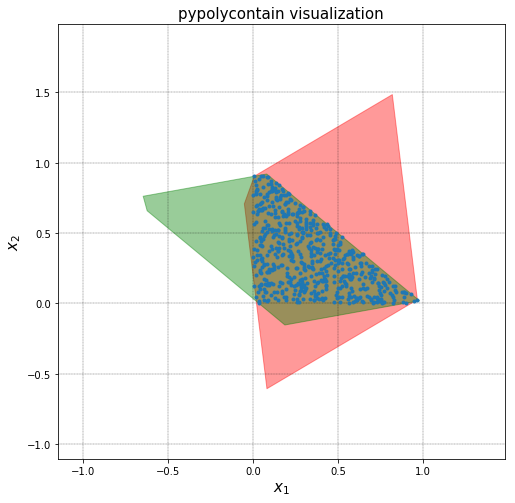

In [132]:
prog=MP.MathematicalProgram()
G=prog.NewContinuousVariables(n,n,'G')
g=prog.NewContinuousVariables(n,1,'g')
# prog.AddPositiveSemidefiniteConstraint(T)
prog.AddMaximizeLogDeterminantSymmetricMatrixCost(G)
_a=h+np.dot(H,g)
_h=np.kron(_a, np.ones(X.shape[1]))
f=np.less_equal(np.dot(np.dot(H,G),X), _h , dtype='object').flatten()
prog.AddLinearConstraint(f)
result=scs_solver.Solve(prog,None,None)
if result.is_success():
    G_n=result.GetSolution(G)
    g_n=np.atleast_2d(result.GetSolution(g)).T
    print(np.linalg.det(G_n))
    H_n=np.dot(H,G_n)
    h_n=h+np.dot(H,g_n)
    # The rest
    P=pp.H_polytope(H,h,color='red')
    Q=pp.H_polytope(H_n,h_n,color='green')
    fig,ax=plt.subplots()
    pp.visualize([P,Q],fig=fig,ax=ax,alpha=0.4)
    ax.plot(X[0,:],X[1,:],'.')
else:
    print("not sucessfull")

In [128]:
prog=MP.MathematicalProgram()
q=X.shape[1]
H_d=prog.NewContinuousVariables(1,n,'H_d')
e=prog.NewContinuousVariables(1,q,'e')
a=prog.NewContinuousVariables(1,q,'a')
h_d=prog.NewContinuousVariables(1,1,'h_d')
f=np.equal( np.dot(H_d,X) + a , e + 1, dtype='object' ).flatten()
prog.AddLinearConstraint(f)
prog.AddBoundingBoxConstraint(0,np.inf,a)
prog.AddBoundingBoxConstraint(-0.01,0.01,e)
prog.AddLinearCost(1*np.ones(q),np.array([0]),a.T)
# prog.AddQuadraticCost(np.dot(e,e.T)[0,0])
# prog.AddLinearConstraint( np.dot(H_d[0,:], H[3,:])>=0 )
result=gurobi_solver.Solve(prog,None,None)
if result.is_success():
    H_d_n=result.GetSolution(H_d)
    h_d_n=result.GetSolution(h_d)
    print(H_d_n, h_d_n)
    print(H[0,:])

[[1.0107028 1.0102997]] [0.]
[-0.06256799  0.82449121]


In [121]:
np.round(result.GetSolution(a),1)

array([[0.7, 0.5, 0.2, 0.4, 1.2, 0.7, 1. , 1.1, 1. , 0.3, 0.9, 0.5, 0.1,
        0. , 1. , 0.7, 0.3, 0.8, 1.2, 0.8, 0.5, 1.2, 0.4, 0.8, 1.1, 1.1,
        0.5, 1.1, 0. , 0.3, 0.4, 0.8, 1.1, 0.4, 0.8, 0.6, 0.9, 0.6, 0.8,
        0.3, 0.6, 0.7, 0.3, 0.2, 1.2, 0.2, 0.8, 0.3, 0.5, 0.9, 0.6, 0.2,
        0.3, 1.3, 0.4, 1. , 1.3, 1. , 1. , 1. , 0.6, 0.6, 1.3, 0.4, 1. ,
        1.2, 0.5, 0.9, 0.9, 0.4, 0.7, 1. , 1.2, 1.2, 1.2, 0.7, 0.3, 0.9,
        0.7, 0.9, 0.9, 1. , 0.8, 1.1, 1.1, 1.1, 0.7, 0.9, 0.8, 0.5, 0.5,
        0.9, 0.5, 0.4, 1.2, 0.9, 1. , 1.2, 0.4, 1.1, 1. , 0.2, 0.3, 0.8,
        1.2, 0.2, 0.5, 0.6, 0.7, 0.8, 1.3, 1. , 1. , 0.5, 0.4, 0.8, 0.8,
        0.7, 1.2, 1.1, 1. , 1.3, 1.3, 0.9, 0.8, 1. , 0.5, 0.8, 1. , 0.8,
        1.2, 0.7, 1.1, 0.9, 0.7, 1.3, 0.8, 1.1, 0.4, 0.1, 0.6, 0.8, 0.4,
        0.9, 0.6, 0.4, 0.9, 1.1, 0.5, 0.5, 1.2, 0.8, 1. , 0.9, 0.3, 1. ,
        0.9, 1.2, 1.1, 0.7, 1. , 0.6, 0.8, 1.2, 1.3, 0.6, 1.1, 0.2, 0.3,
        0.1, 1. , 0.5, 0.9, 0.6, 0.9, 0.8, 0.8, 0.8